In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
housing_data = pd.read_csv("Kenya-Housing-Dataset/apartments.csv")

In [36]:
housing_data.describe(include="all")


,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
count,2520.000000,2520,2144,2520.000000,2520.000000,2520,2520
unique,NaN,18,17,NaN,NaN,16,2
top,NaN,3 Bedroom Apartment / Flat to rent in Nyali,"Kileleshwa, Nairobi",NaN,NaN,55 000,Per Month
freq,NaN,252,257,NaN,NaN,382,2395
mean,1259.500000,NaN,NaN,2.551190,2.450794,NaN,NaN
std,727.605662,NaN,NaN,0.922868,0.976480,NaN,NaN
min,0.000000,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,629.750000,NaN,NaN,2.000000,2.000000,NaN,NaN
50%,1259.500000,NaN,NaN,3.000000,2.000000,NaN,NaN
75%,1889.250000,NaN,NaN,3.000000,3.000000,NaN,NaN


In [37]:
housing_data[housing_data["location"].isnull()]

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
7,7,3 Bedroom Apartment / Flat to rent in Westlands,NaN,3,3,78 000,Per Month
15,15,2 Bedroom Apartment / Flat to rent in Hurlingham,NaN,2,2,75 000,Per Month
18,18,3 Bedroom Apartment / Flat to rent in Nyali,NaN,3,2,45 000,Per Month
29,29,3 Bedroom Apartment / Flat to rent in Westlands,NaN,3,3,78 000,Per Month
36,36,2 Bedroom Apartment / Flat to rent in Hurlingham,NaN,2,2,75 000,Per Month
...,...,...,...,...,...,...,...
2493,2493,2 Bedroom Apartment / Flat to rent in Hurlingham,NaN,2,2,75 000,Per Month
2496,2496,3 Bedroom Apartment / Flat to rent in Nyali,NaN,3,2,45 000,Per Month
2506,2506,3 Bedroom Apartment / Flat to rent in Westlands,NaN,3,3,78 000,Per Month
2513,2513,2 Bedroom Apartment / Flat to rent in Hurlingham,NaN,2,2,75 000,Per Month


In [38]:
#Solving the missing values in the 'location' column
housing_data['location'] = (housing_data['title'].str.split('in ', expand=True)[1])
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2520 non-null   int64 
 1   title       2520 non-null   object
 2   location    2520 non-null   object
 3   bedrooms    2520 non-null   int64 
 4   bathrooms   2520 non-null   int64 
 5   price       2520 non-null   object
 6   rate        2520 non-null   object
dtypes: int64(3), object(4)
memory usage: 137.9+ KB


In [39]:
housing_data['price'] = housing_data['price'].str.replace(' ', '')
housing_data['price'] = housing_data['price'].astype(int)
housing_data = housing_data.rename(columns={'Unnamed: 0 ': 'idx'})

bedrooms
3    1010
2     749
1     381
4     380
Name: count, dtype: int64
bathrooms
2    1004
3     879
1     381
4     130
5     126
Name: count, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x1ef4b3b3ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef4b3b6810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef4b3b2cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef4b3bc8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef4b3bd8d0>],
 'means': []}

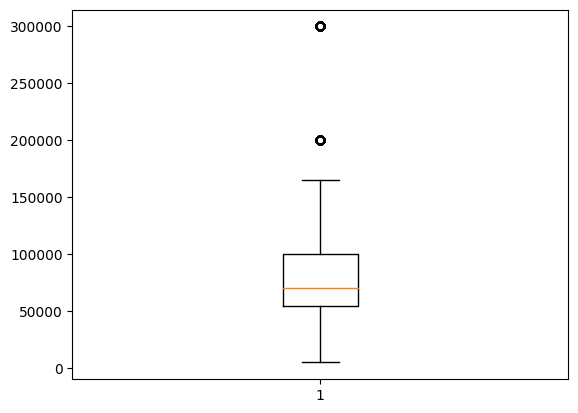

In [40]:
#look for any possible ouliers
print(housing_data['bedrooms'].value_counts())
print(housing_data['bathrooms'].value_counts())
plt.boxplot(housing_data['price'])

In [41]:
housing_data.loc[housing_data['price'] > 150000, 'price'].value_counts().sort_index()

price
165000    129
200000    125
300000    126
Name: count, dtype: int64

In [42]:
#Data Preparation
#changing the location column to categorical data for the model
housing_data['location'] = housing_data['location'].astype('object')

In [43]:
#Select the necessary columns for training the model
X = housing_data[['location', 'bedrooms', 'bathrooms',]]
y = housing_data['price']

#Converting the values in 'location' to numerical values
location_map = {'Riverside' : 0, 'Kileleshwa' :1, 'Nyali' :2, 'Lavington' :3, 'Kahawa Wendani' :4,
       'Kilimani' :5, 'Westlands' :6, 'Muthaiga' :7, 'Kikuyu':8, 'Shanzu' :9,
       'Hurlingham' :10, 'Spring Valley' :11}
X['location'] = X['location'].map(location_map)


#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\25479\AppData\Local\Temp\ipykernel_13512\509816444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['location'] = X['location'].map(location_map)


In [44]:
#Training and Testing Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Make Predictions on the test set
y_pred = tree.predict(X_test)

#Calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))

Accuracy score: 0.86


Text(0.5, 1.0, 'Bar Plot: Location vs Price')

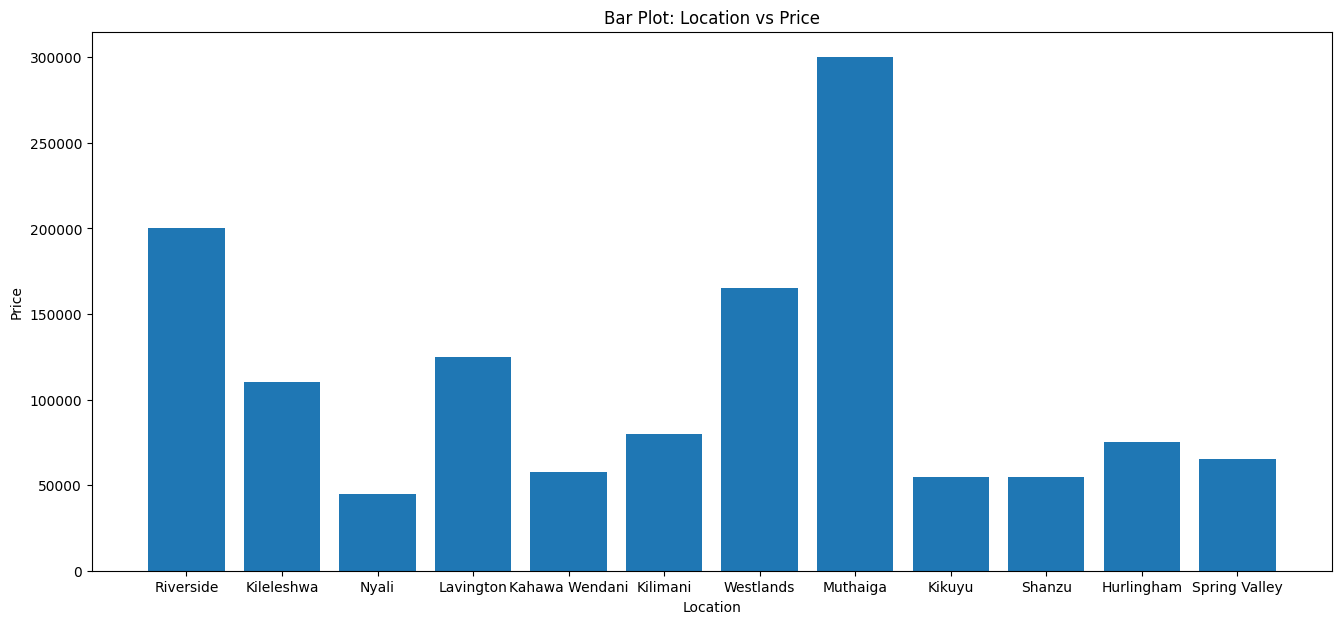

In [49]:
#RELATIONSHIP BETWEEN THE LOCATION AND THE PRICES OF THE APARTMENTS
plt.figure(figsize=(16, 7))

plt.bar(housing_data['location'], housing_data['price'])
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Bar Plot: Location vs Price')


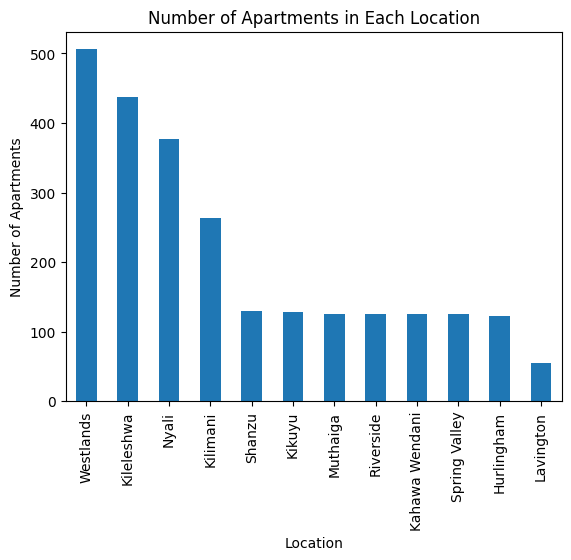

In [48]:
#RELATIONSHIP BETWEEN THE NUMBER OF APARTMENTS IN EACH LOCATION
apartment_counts = housing_data['location'].value_counts()

apartment_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Apartments')
plt.title('Number of Apartments in Each Location')
plt.show()